In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [186]:
df = pd.read_csv("./data.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [187]:
# util func to aggregate bool vars
def convert(mat, mapping, *, dtype=str):
    res = np.empty(mat.shape[0], dtype=dtype)
    if dtype is np.int64:
        res = np.zeros(mat.shape[0], dtype=np.int64)
    for row, col in mat:
        res[row] = mapping[col]
    return res

In [188]:
# Transforming Education columns in a single labeled one
int2lab = {0: '2n cycle', 1: 'basic', 2: 'graduation', 3: 'master', 4: 'phd'}
ed_mat = df.iloc[:, 31:36]

converted = convert(np.argwhere(ed_mat == 1), int2lab)

# modifying dataset in place
df.drop(df.columns[31:36], axis=1, inplace=True)
df.insert(31, 'education', converted)
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,0,0,1,0,0,g,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2272,0,0,1,0,0,g,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2471,0,0,0,1,0,g,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,2298,0,0,0,1,0,g,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,2320,0,1,0,0,0,p,407,392,0


In [189]:
# Doing the same for marital status
int2lab = {0: 'divorced', 1: 'married', 2: 'single', 3: 'together', 4: 'widow'}
mar_mat = df.iloc[:, 26:31]

converted = convert(np.argwhere(mar_mat == 1), int2lab)

# modifying dataset in place
df.drop(df.columns[26:31], axis=1, inplace=True)
df.insert(26, 'marital_status', converted)
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_status,education,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,11,1,63,2822,s,g,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,11,0,66,2272,s,g,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,11,0,55,2471,t,g,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,11,0,36,2298,t,g,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,11,0,39,2320,m,p,407,392,0


In [190]:
# transform some columns into bool type
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype(bool)
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype(bool)
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype(bool)
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype(bool)
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype(bool)
df['Complain'] = df['Complain'].astype(bool)
df['Response'] = df['Response'].astype(bool)

# transform some columns in categorical values
df['Kidhome'] = df['Kidhome'].astype(int)
df['Teenhome'] = df['Teenhome'].astype(int)
df['NumDealsPurchases'] = df['NumDealsPurchases'].astype(int)
df['NumWebPurchases'] = df['NumWebPurchases'].astype(int)
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].astype(int)
df['NumStorePurchases'] = df['NumStorePurchases'].astype(int)
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].astype(int)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_status,education,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,3,11,True,63,2822,s,g,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,3,11,False,66,2272,s,g,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,3,11,False,55,2471,t,g,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,3,11,False,36,2298,t,g,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,11,False,39,2320,m,p,407,392,0


In [191]:
# remove useless column
# remove Z_CostContact and Z_Revenue since it's not in the dictionary and if present it has only value 3 and 11 respectively
df.drop(df.columns[df.columns.get_loc("Z_CostContact")], axis=1, inplace=True)
df.drop(df.columns[df.columns.get_loc("Z_Revenue")], axis=1, inplace=True)
# removing MntTotal and MntRegularProds since they are sum over Mnt columns
df.drop(df.columns[df.columns.get_loc("MntTotal")], axis=1, inplace=True)
df.drop(df.columns[df.columns.get_loc("MntRegularProds")], axis=1, inplace=True)
# removing AcceptedCmpOverall since it's sum of AcceptedCmp values
df.drop(df.columns[df.columns.get_loc("AcceptedCmpOverall")], axis=1, inplace=True)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_status,education
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,False,True,63,2822,s,g
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,False,False,66,2272,s,g
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,False,55,2471,t,g
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,False,36,2298,t,g
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,False,False,False,39,2320,m,p


In [192]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,51.095692,2512.718367
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,11.705801,202.563647
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,43.000000,2339.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,50.000000,2515.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,61.000000,2688.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,80.000000,2858.000000


In [193]:
# Inspecting distributions
def analyze_continuous_distribution(var_name, values, *, bins = 30):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(values, color='blue', kde=True, bins=bins)
    plt.axvline(x=df[var_name].mean(), color='red', linestyle='--') # mean line
    plt.axvline(x=df[var_name].median(), color='orange', linestyle='-.') # median line
    plt.xlabel(var_name)
    plt.title(f"Histogram of {var_name}")
    # add lines legend
    mean_patch = mpatches.Patch(color='red', label='Mean')
    median_patch = mpatches.Patch(color='orange', label='Median')
    plt.legend(handles=[mean_patch, median_patch])

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=values, color='orange')
    plt.xlabel(var_name)
    plt.title(f"Boxplot of {var_name}")

    plt.show()

def analyze_discrete_distribution(var_name, values):
        plt.figure(figsize=(10, 4))

        sns.countplot(x=values, data=df)
        plt.xlabel(var_name)
        plt.ylabel("Count")
        plt.title(f"Bar Chart of {var_name}")
        plt.xticks(rotation=45)

        plt.show()

def analyze_df(continuous_vars, discrete_vars):
    # Continuous var analysis
    print("Analyzing continuous variables...")
    for var in continuous_vars:
        analyze_continuous_distribution(var, df[var])

    # Discrete var analysis
    print("Analyzing discrete variables...")
    for var in discrete_vars:
        analyze_discrete_distribution(var, df[var])


In [194]:
# Counting the number of duplicate rows in the dataset
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 184


In [195]:
# removing duplicates
df.drop_duplicates(inplace=True)
df.shape[0]

2021

In [196]:
# Identify columns with inconsistencies in their values
print(f"Number of unique value in each column\n{df.nunique()}")

Number of unique value in each column
Income                 1963
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         551
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      13
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Age                      56
Customer_Days           662
marital_status            5
education                 5
dtype: int64


In [197]:
# check for null values
df.isnull().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Customer_Days          0
marital_status         0
education              0
dtype: int64

Analyzing continuous variables...


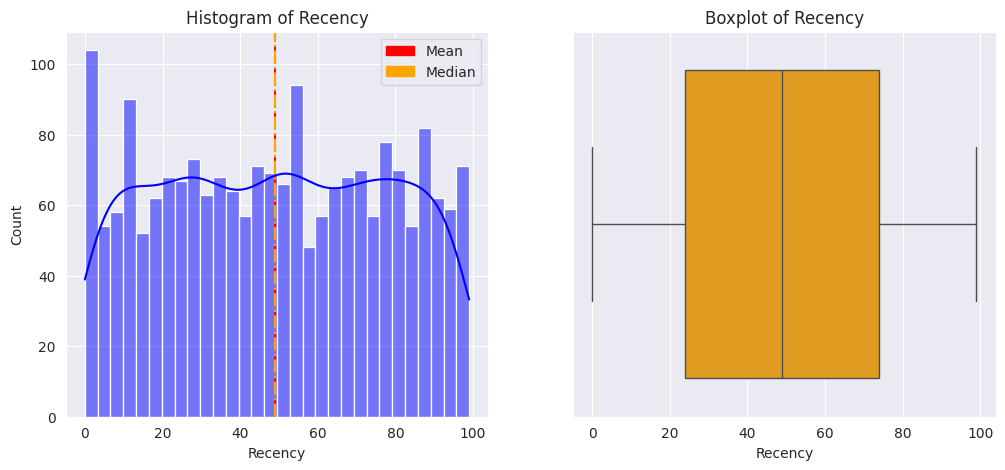

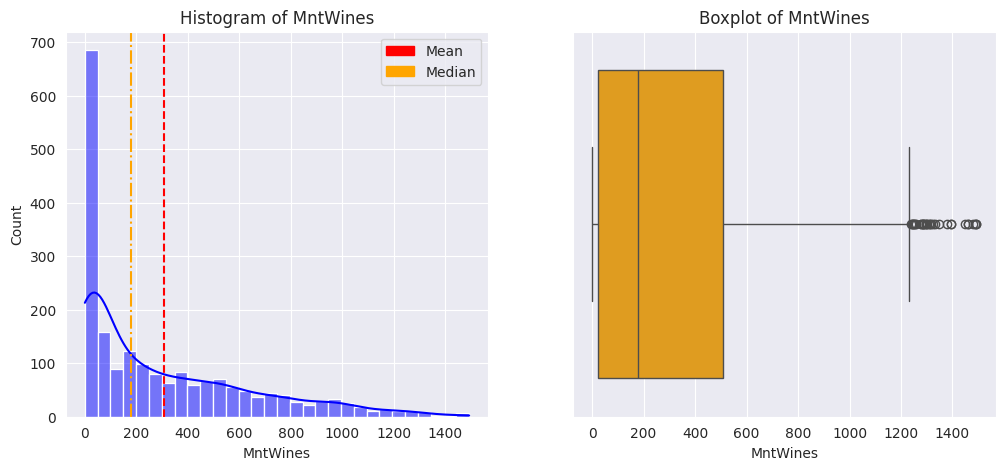

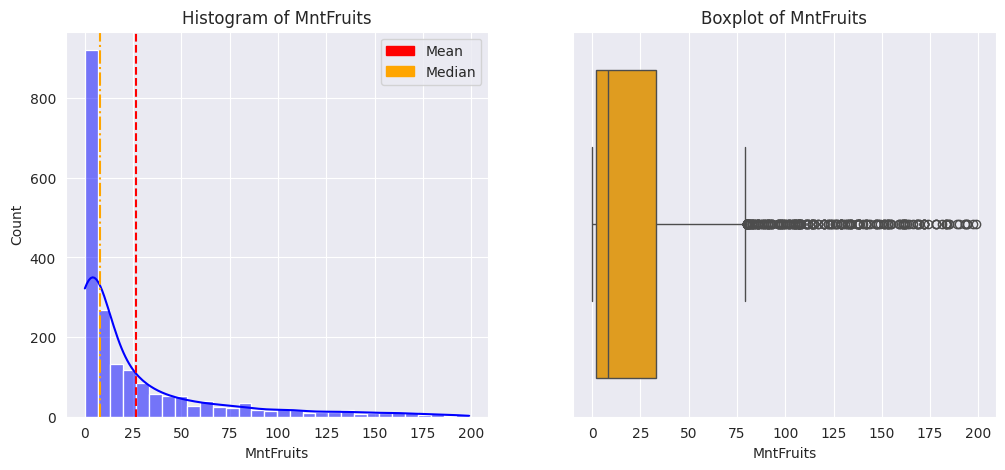

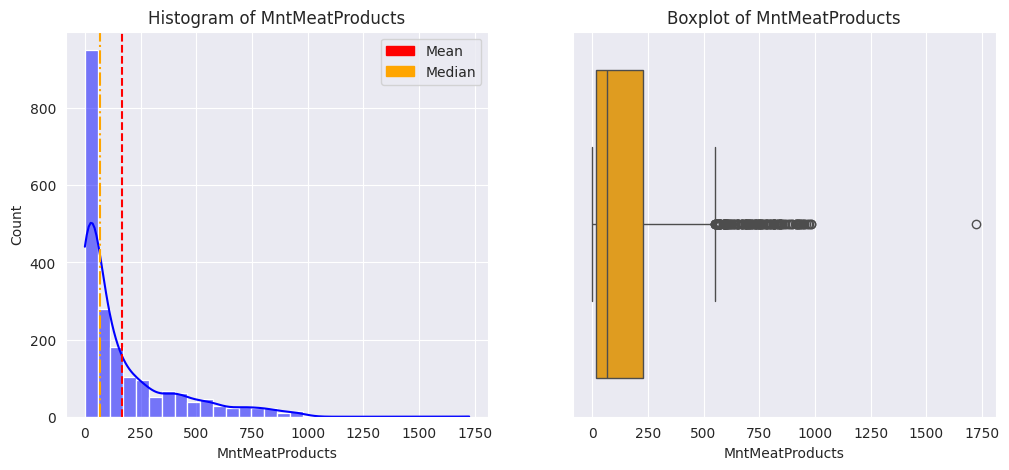

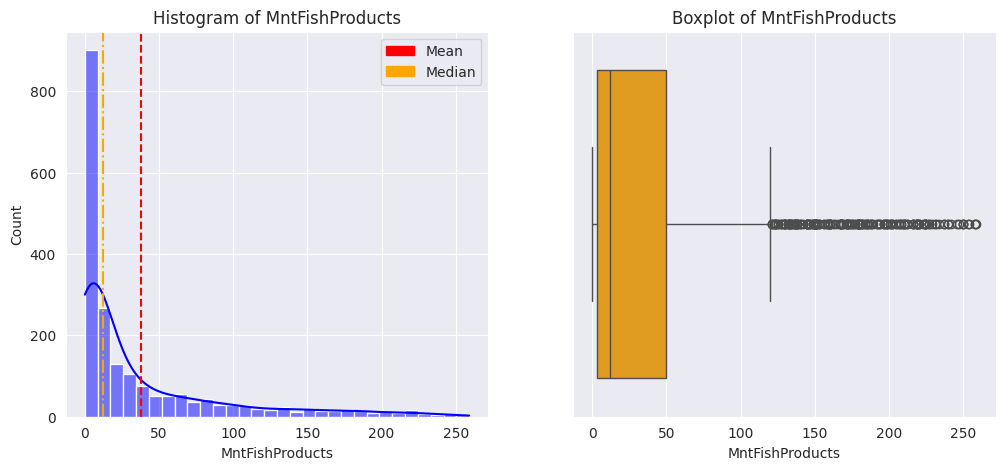

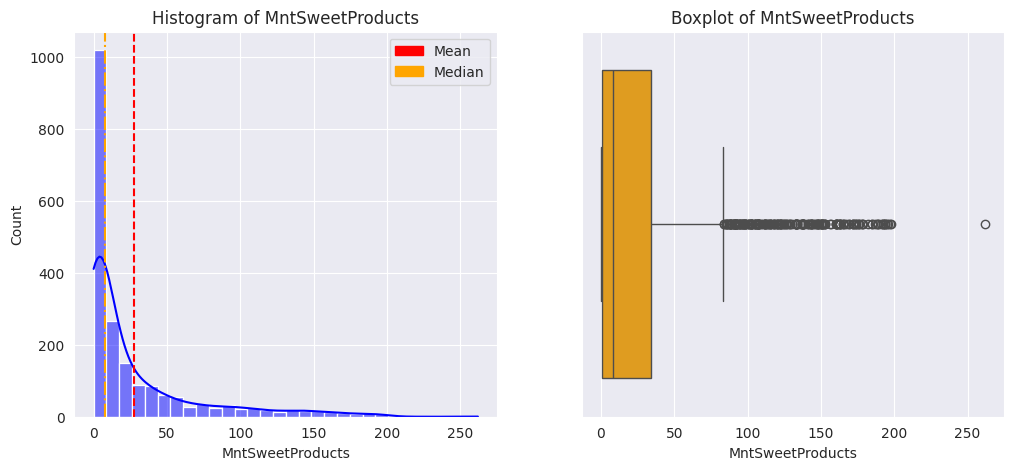

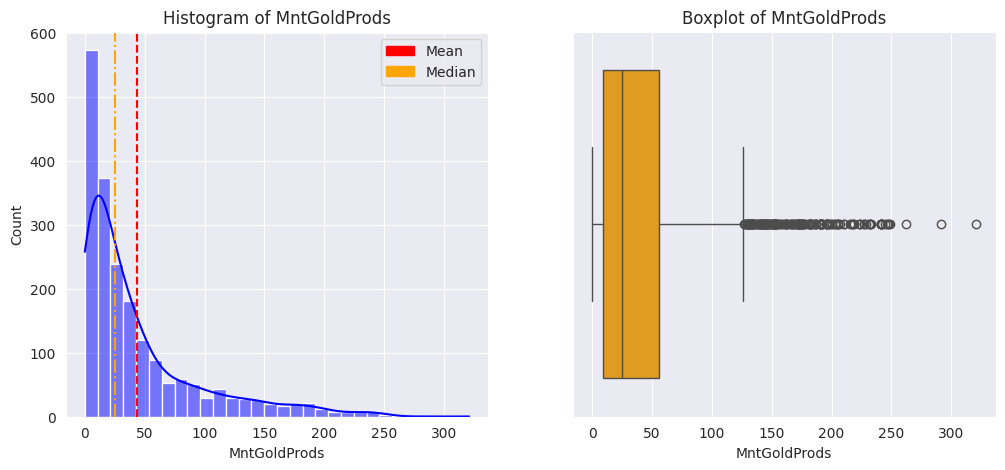

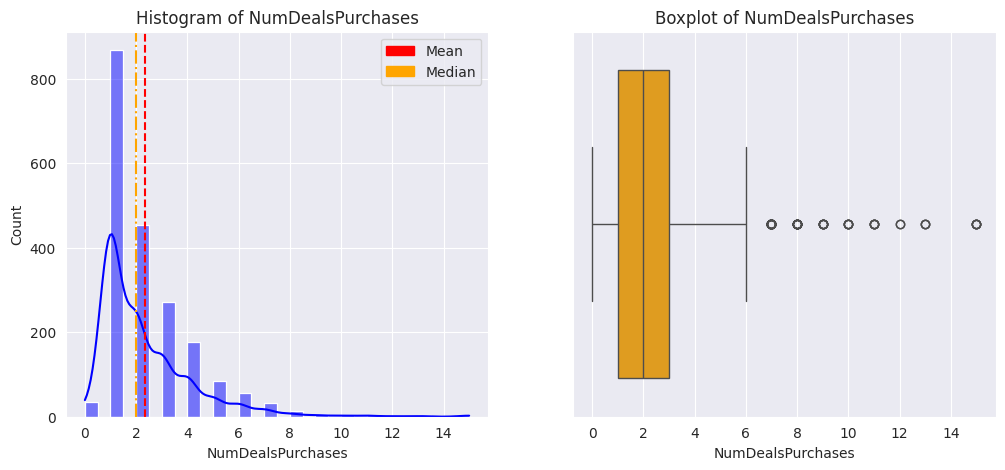

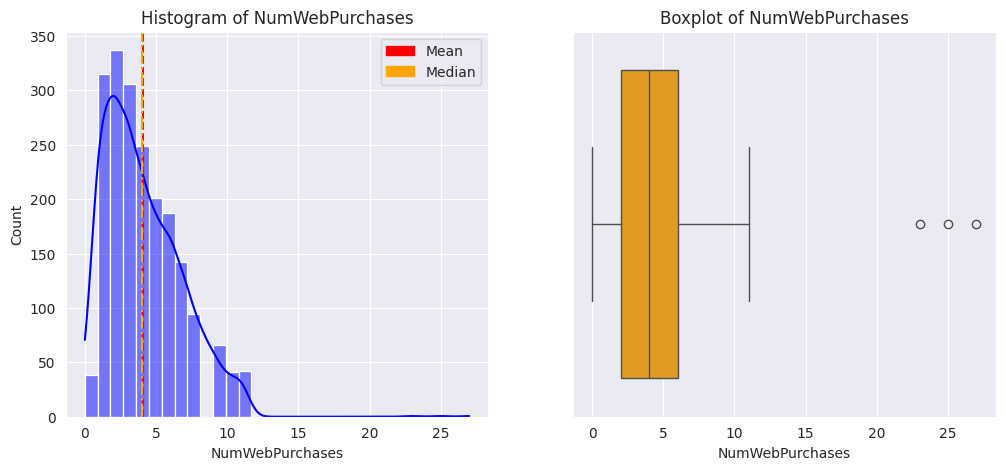

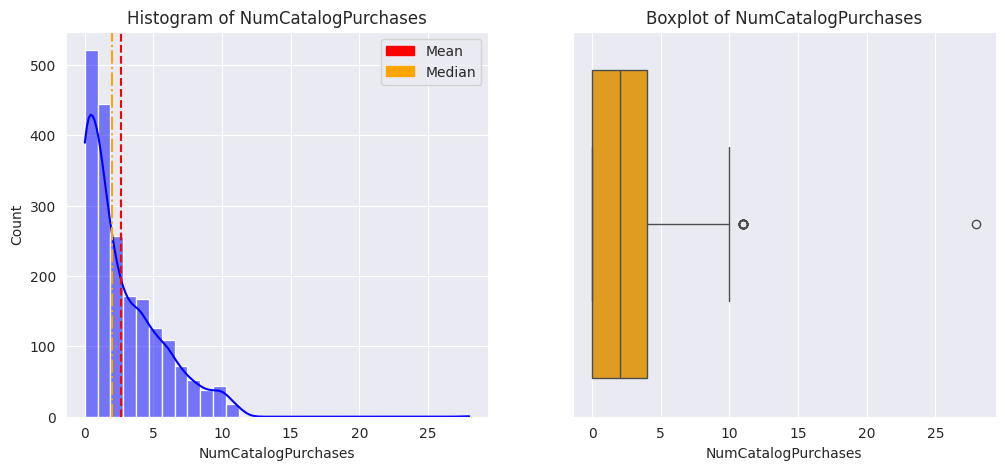

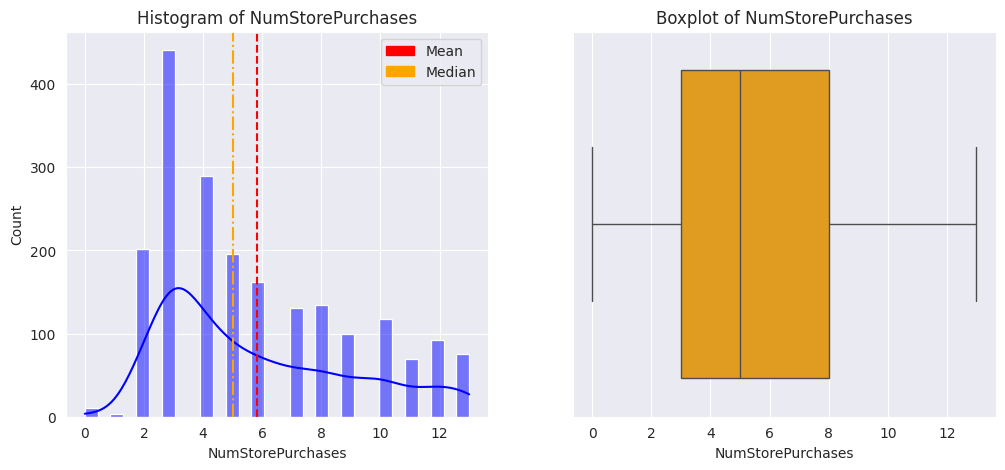

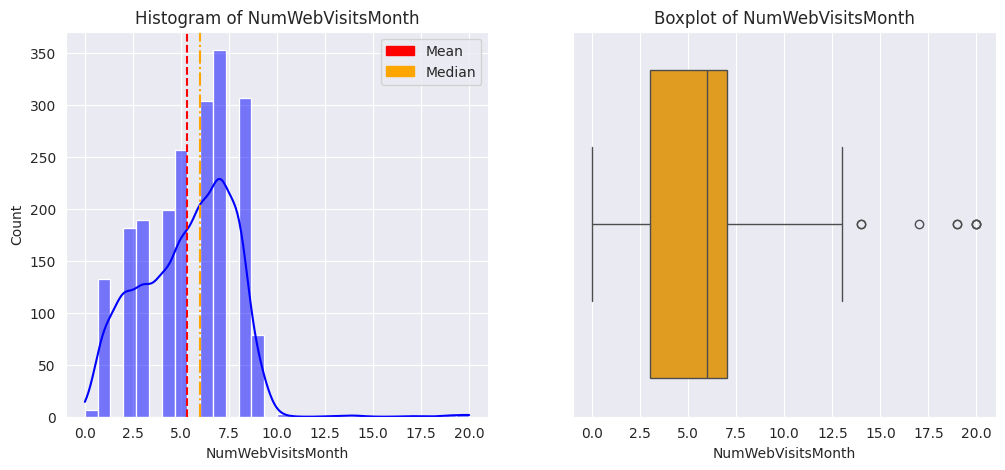

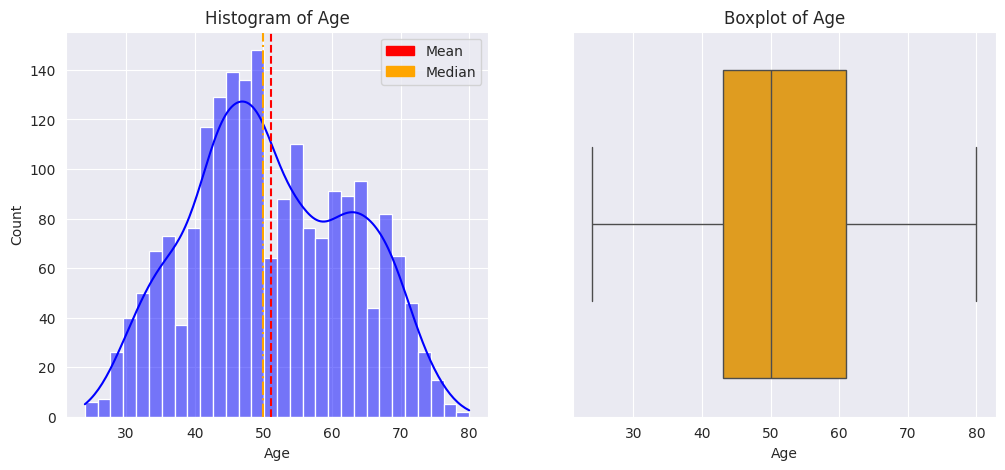

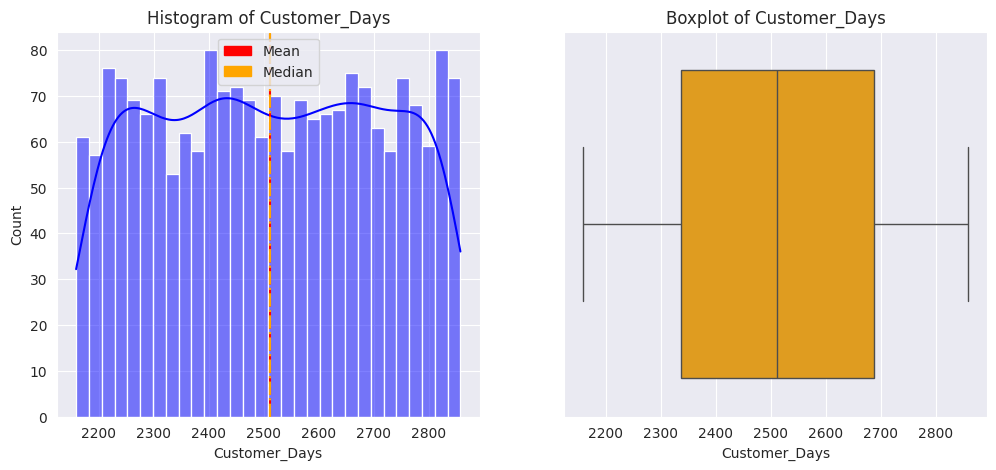

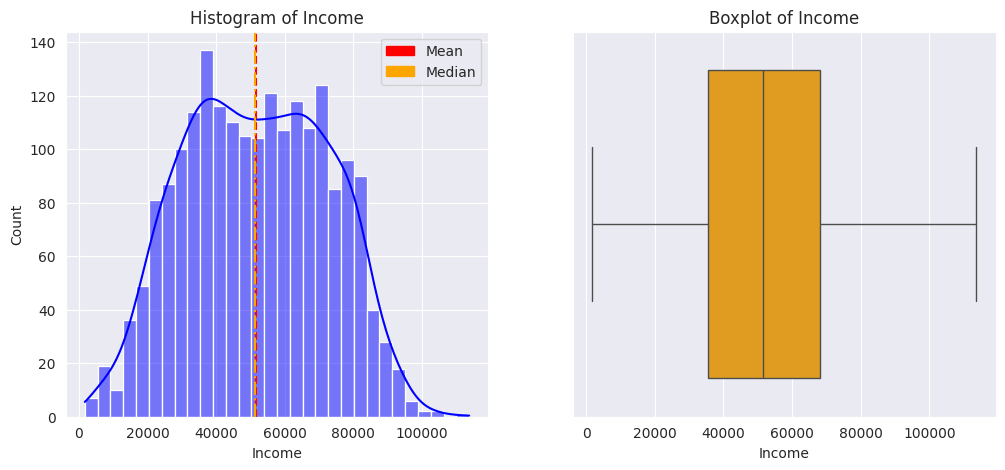

Analyzing discrete variables...


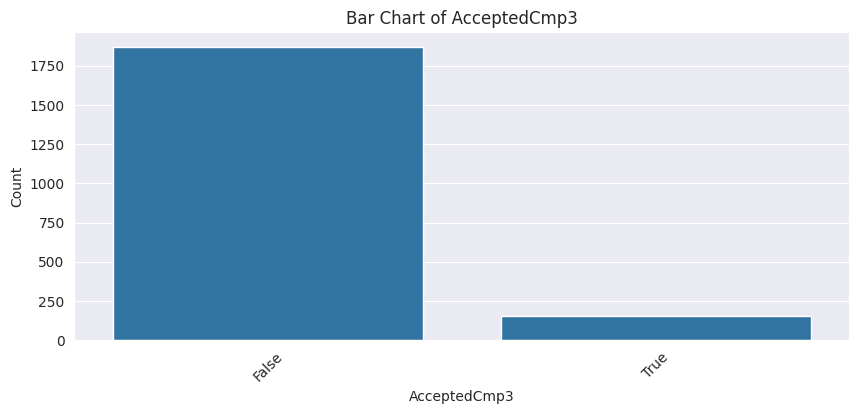

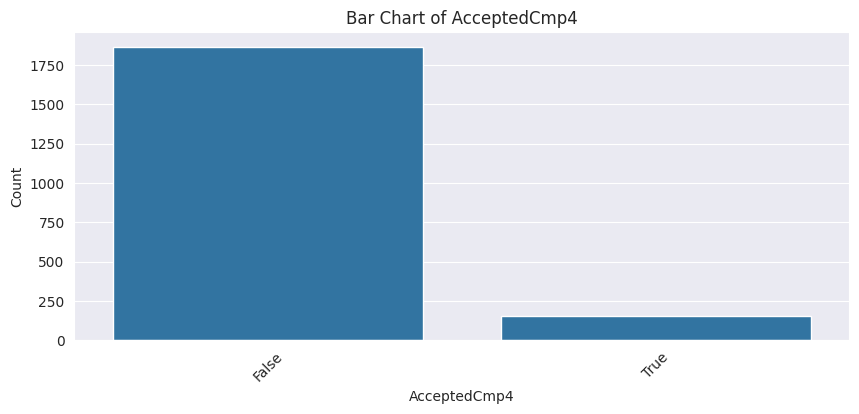

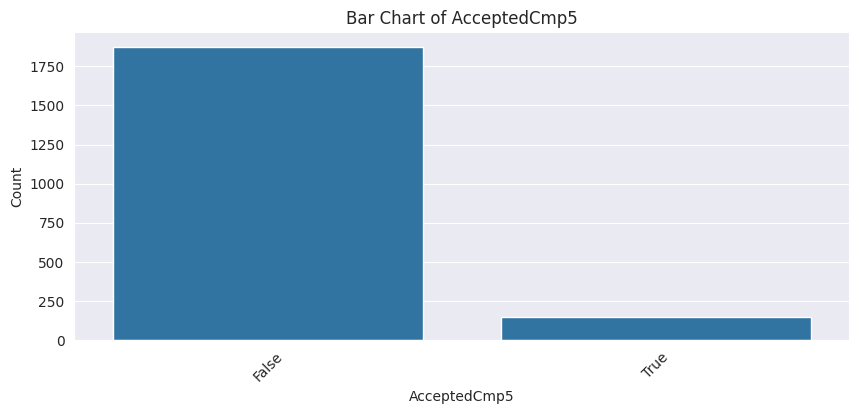

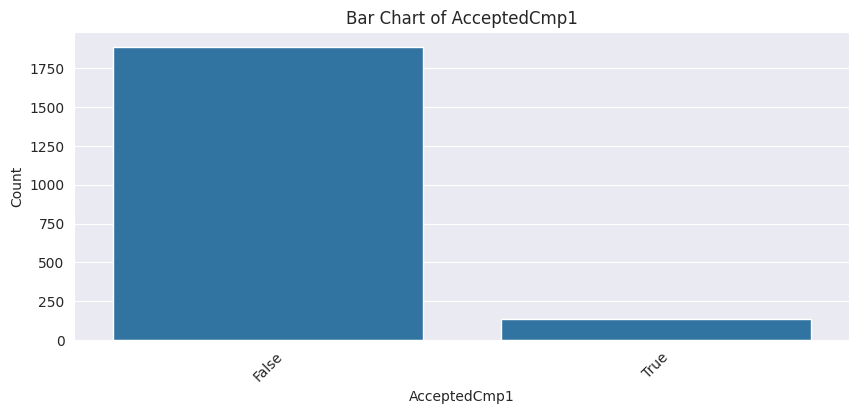

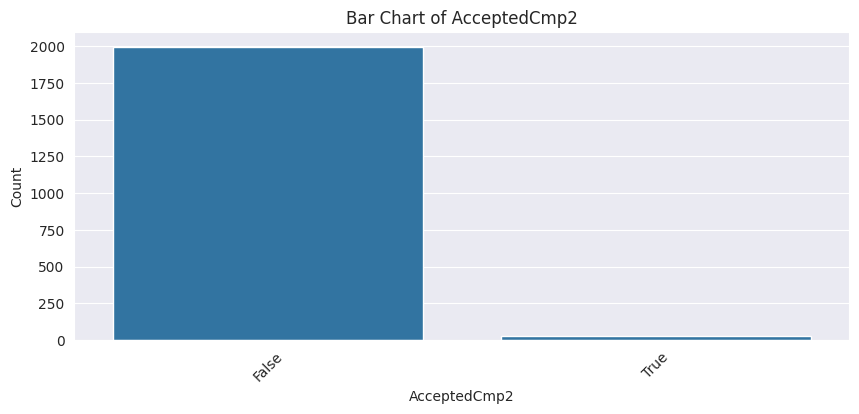

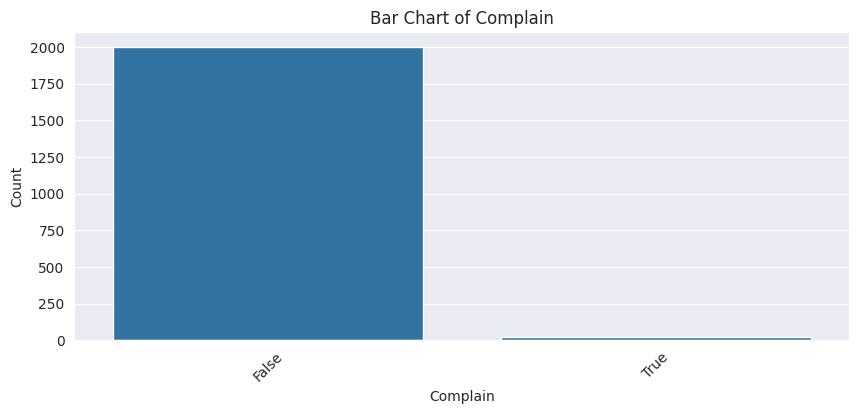

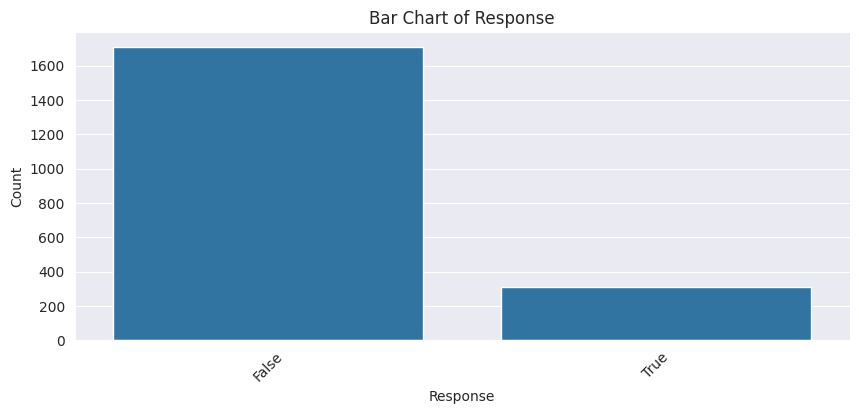

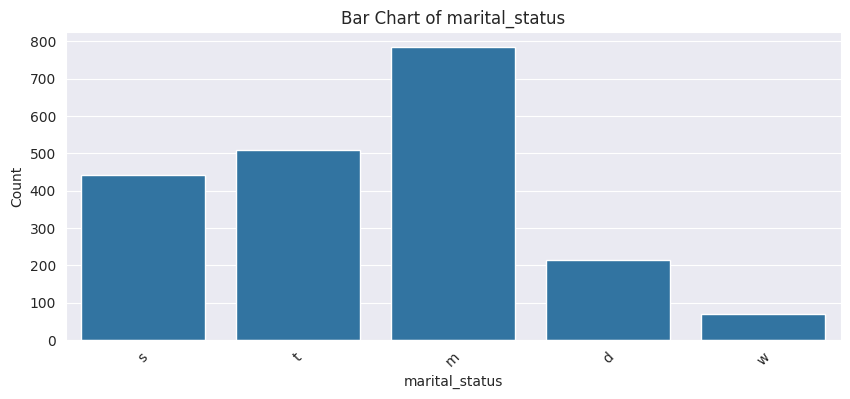

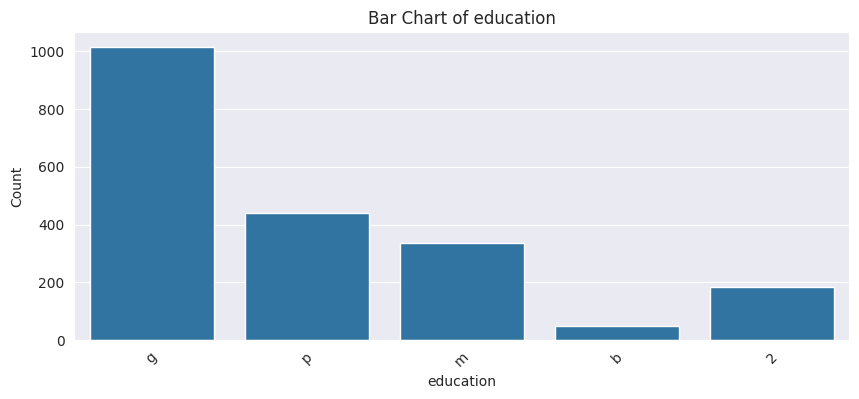

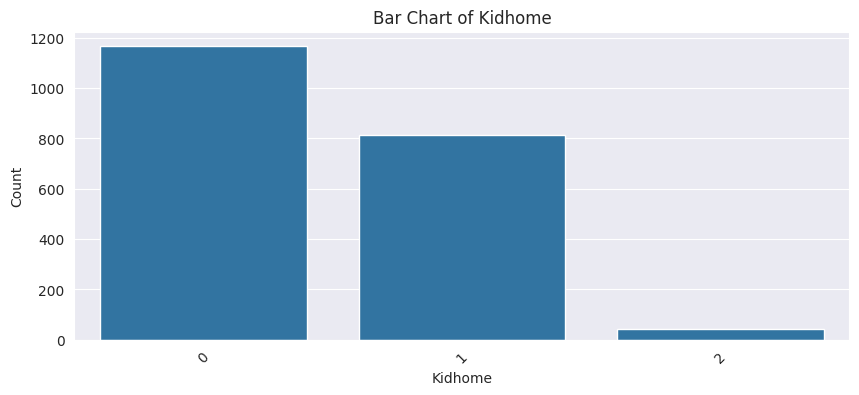

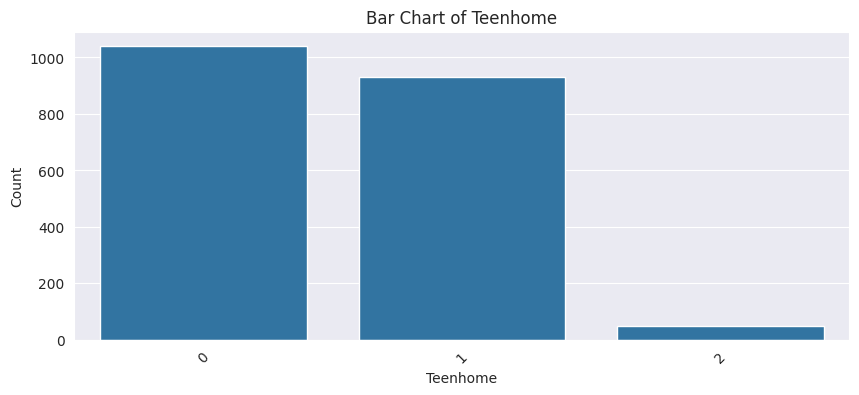

In [198]:
# analyzing distributions
discrete_vars = [column for column, is_type in [*(df.dtypes=="str").items(), *(df.dtypes=="bool").items(), *(df.dtypes=="object").items()] if is_type]
discrete_vars.extend(["Kidhome", "Teenhome"])
continuous_vars = [column for column, is_type in [*(df.dtypes==np.int64).items(), *(df.dtypes==np.float64).items()] if is_type and column not in discrete_vars]
analyze_df(continuous_vars, discrete_vars)

In [199]:
# No outliers will be removed since are plausible for the Mnt columns

# saving the dataset
df.to_csv("./data_cleaned.csv", index=False)